In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score,r2_score

In [2]:
df= pd.read_csv('/content/engine_data.csv')

In [3]:
df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [4]:
df = df.drop_duplicates()

<Axes: >

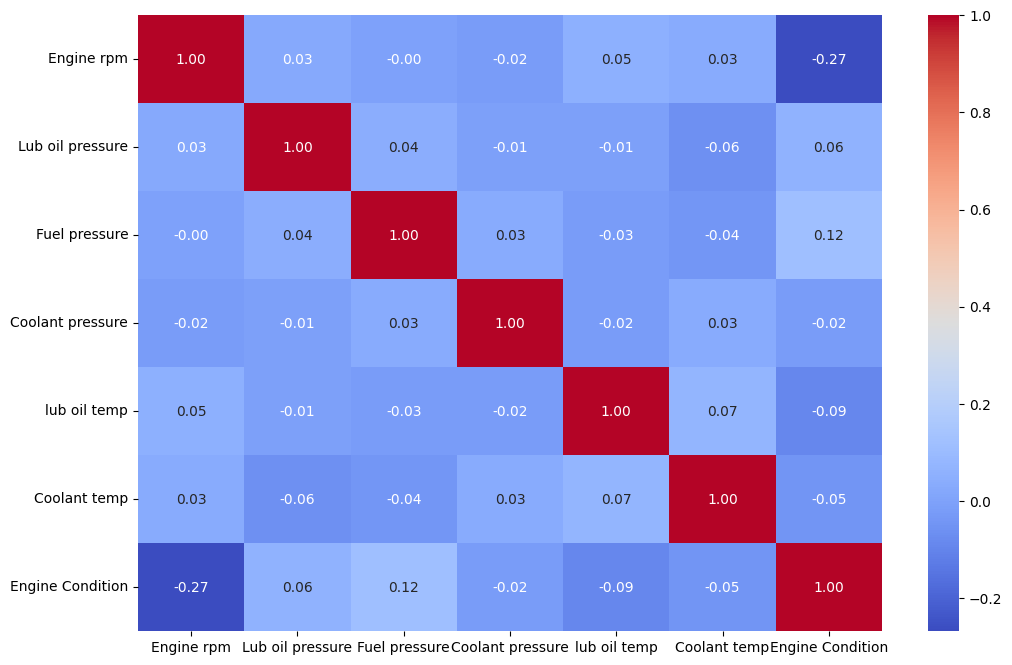

In [5]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

In [6]:
df['Temperature_difference'] = df['Coolant temp'] - df['lub oil temp']

In [7]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition',
       'Temperature_difference'],
      dtype='object')

<Axes: >

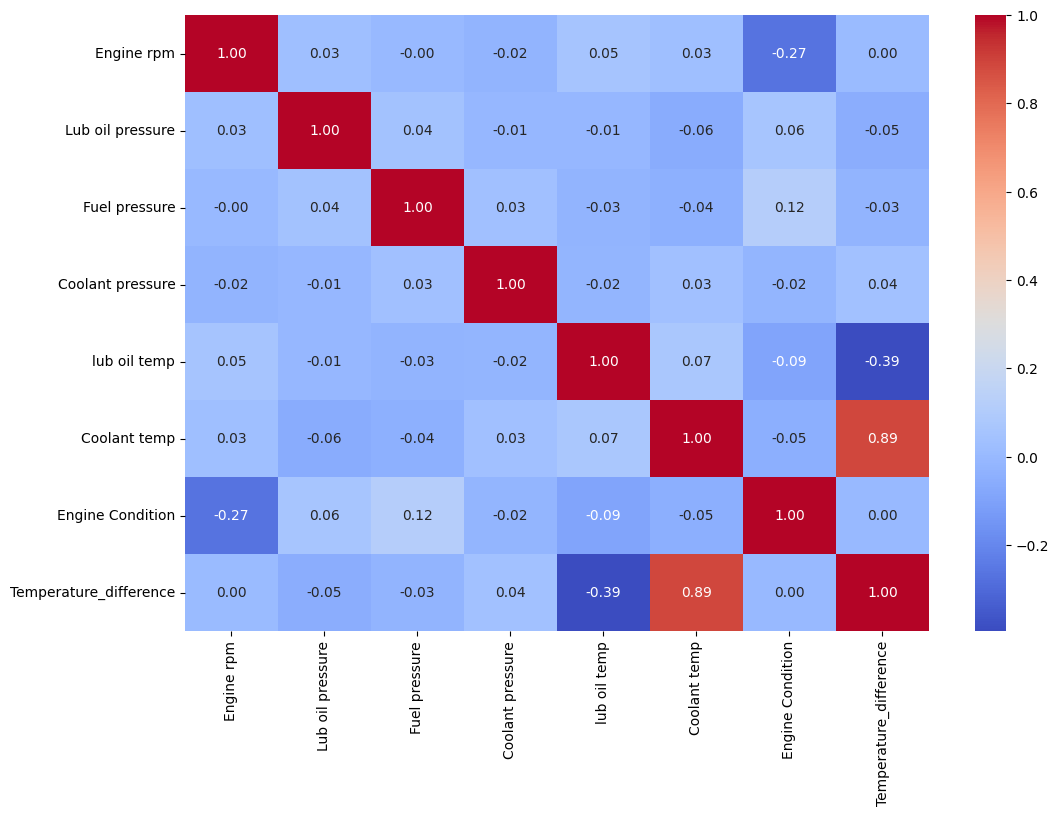

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

In [37]:
X= df.drop(['Engine Condition','Temperature_difference'], axis=1)
# X=df[['Fuel pressure','Lub oil pressure','Temperature_difference']]
y=df['Engine Condition']

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Linear Regression**

In [12]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [15]:
r2

0.09928894305194547

In [16]:
rmse

0.45586382814974097

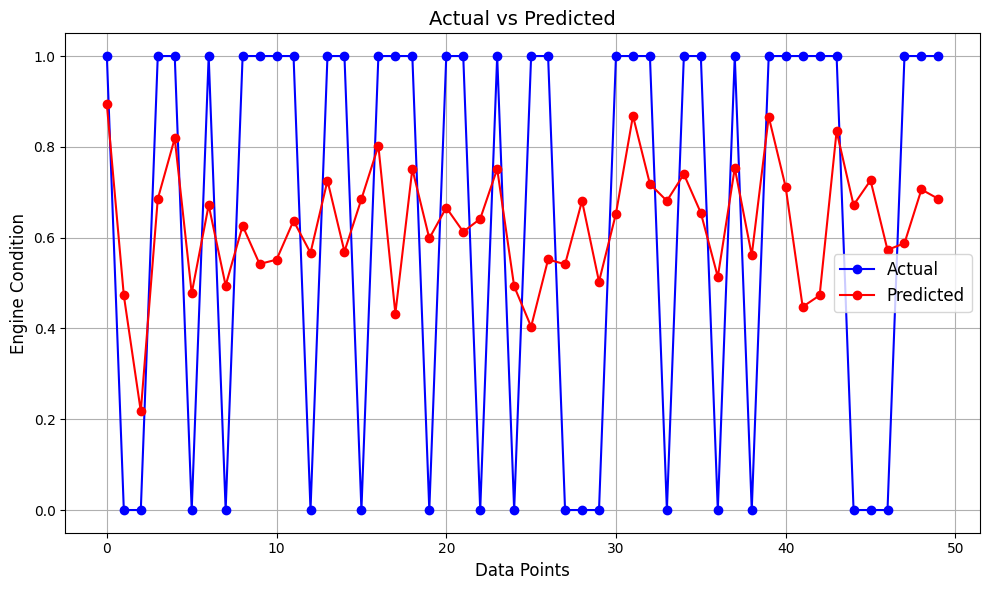

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o", linestyle="-")


plt.plot(y_pred[:50], label="Predicted", color="red", marker="o", linestyle="-")

plt.title("Actual vs Predicted", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Engine Condition", fontsize=12)


plt.legend(fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

Decision Tree **Regressor**

In [18]:
model2=DecisionTreeRegressor(random_state=0)
model2.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
y_pred2 = model2.predict(X_test)

In [20]:
mse2 = mean_squared_error(y_test,y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test,y_pred2)

In [21]:
rmse2, r22

(0.6385371687650988, -0.7672076882189391)

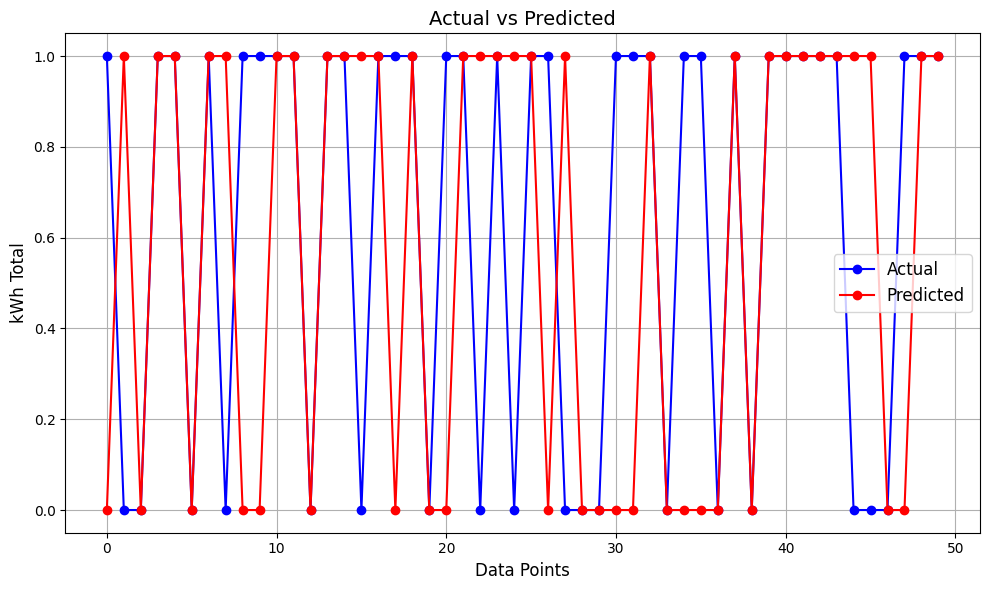

In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o", linestyle="-")


plt.plot(y_pred2[:50], label="Predicted", color="red", marker="o", linestyle="-")

plt.title("Actual vs Predicted", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("kWh Total", fontsize=12)


plt.legend(fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

LOGISTIC REGRESSION

In [23]:
model3 = LogisticRegression(random_state=0)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


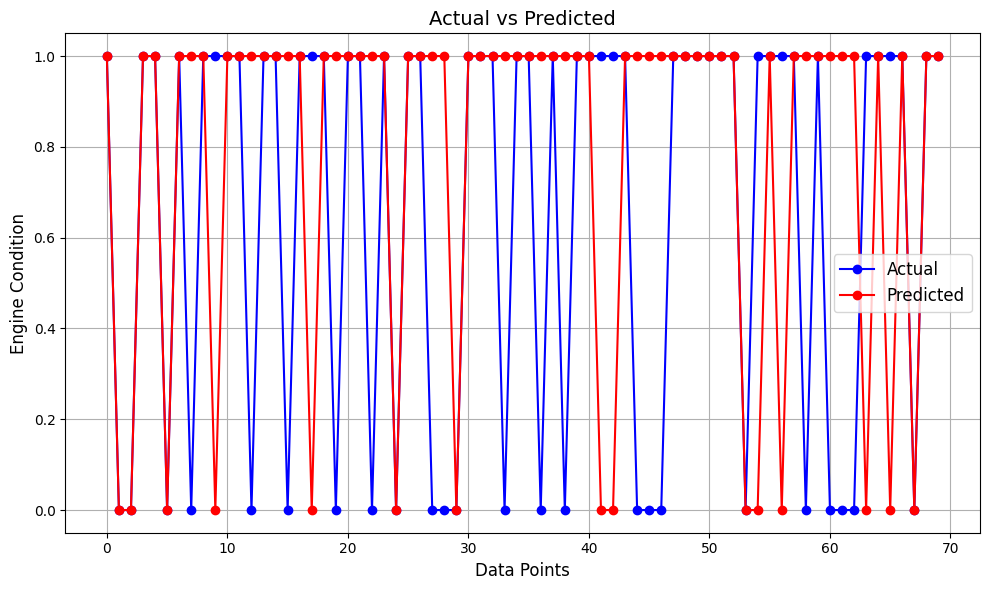

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.plot(y_test.values[:70], label="Actual", color="blue", marker="o", linestyle="-")


plt.plot(y_pred3[:70], label="Predicted", color="red", marker="o", linestyle="-")

plt.title("Actual vs Predicted", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Engine Condition", fontsize=12)


plt.legend(fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

Random Forest

In [25]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)


y_pred4 = rf_model.predict(X_test)

print(f'accuracy Score: {accuracy_score(y_test, y_pred4)}')


accuracy Score: 0.6585615561812133


Boosting

In [26]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [27]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=8, random_state=0, verbose=0)
catboost_model.fit(X_train, y_train, eval_set=(X_test,y_test))

In [28]:
y_pred6 = catboost_model.predict(X_test)

In [29]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred6)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred6)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.20474262277891286
R-squared: 0.1125916925452064


LIGHTGBM

In [40]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [41]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred7 = lgbm_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9821, number of negative: 5807
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 15628, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628423 -> initscore=0.525459
[LightGBM] [Info] Start training from score 0.525459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [42]:
accuracy = accuracy_score(y_test, y_pred7)
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred7))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred7))

Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.41      0.47      1411
           1       0.71      0.82      0.76      2496

    accuracy                           0.67      3907
   macro avg       0.63      0.61      0.62      3907
weighted avg       0.66      0.67      0.66      3907

Confusion Matrix:
 [[ 579  832]
 [ 457 2039]]
